# Clustering

In [54]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import homogeneity_score

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [55]:
import pandas as pd

batch_size = 512
train_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_test.csv'))

X_train = train_data[:, 1:785]
y_train = train_data[:, 0]
X_test = test_data[:, 1:785]
y_test = test_data[:, 0]

# K-means

## Fit and Predict

`fit_predict` Compute cluster centers and predict cluster index for each sample.



`kmeans.fit_predict` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict">Documentation Link</a>

In [56]:
from sklearn.cluster import KMeans

In [57]:
k = 10 #10 classes
kmeans = KMeans(n_clusters=k, random_state=42) #Define the kmeans algorithm with 10 clusters
y_pred = kmeans.fit_predict(X_train) #Assign the images in the dataset a cluster

In [58]:
y_pred

array([0, 8, 3, ..., 4, 4, 1])

In [59]:
print(homogeneity_score(y_train, y_pred))

0.5012376251559566


50% homogeneity score, so basically certain clusters contain images from multiple classes

Each instance was assigned to one of the 10 clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification.

In [103]:
y_pred is kmeans.labels_

True

And the following 10 centroids (i.e., cluster centers) were estimated:

In [104]:
kmeans.cluster_centers_

array([[-7.26415456e-18,  1.71013254e-03,  2.43693886e-02, ...,
         5.94698589e-01,  4.28388200e-01,  9.19196238e-02],
       [-9.21571847e-18,  7.11236625e-17, -4.09394740e-16, ...,
         2.17603713e-14,  1.07691633e-14, -1.11022302e-15],
       [ 1.83606557e-03,  4.19672131e-03,  2.15081967e-02, ...,
         3.07540984e+00,  1.40708197e+00,  9.12786885e-02],
       ...,
       [ 2.65005963e-04,  9.80522062e-03,  6.63839936e-02, ...,
         2.57002783e+00,  5.70557838e-01,  5.37962104e-02],
       [-9.43255890e-18,  3.01904320e-03,  3.01904320e-03, ...,
         2.78680910e-03,  2.32234092e-03, -9.43689571e-16],
       [ 3.52208074e-03,  9.88891899e-03,  8.38526145e-02, ...,
         7.27445137e-02,  2.53318884e-02,  3.11568681e-03]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [105]:
labelpred = kmeans.labels_
labelpred

array([0, 8, 3, ..., 4, 4, 1])

##### Initial Inertia - sum of squared distances - lower value is better - measures how internally coherent/logical clusters are (how close each instance is to its centroid)

In [106]:
kmeans.inertia_

123913600595.06837

In [107]:
y_pred = kmeans.predict(X_test)

In [108]:
print(homogeneity_score(y_test, y_pred))

0.49876163409216845


In [109]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train, labelpred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.011


# Hard Clustering vs Soft Clustering
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. 

`kmeans.transform` Transforms X to a cluster-distance space.

`kmeans.transform` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.transform">Documentation Link</a>

In [13]:
kmeans.transform(X_train)

array([[1833.59762914, 3241.17867176, 3483.62903025, ..., 2778.14122469,
        2848.72641721, 2749.90343554],
       [2205.54220106, 1788.20537288, 2102.94070011, ..., 2340.68040632,
        1135.81627444, 3208.69661985],
       [2706.70170562, 3597.59245592, 3484.99314509, ..., 2271.53666158,
        3343.72104187, 1884.28590207],
       ...,
       [2831.28265477, 2979.82651792, 2921.98422809, ..., 2254.89135883,
        2872.65942697, 2285.08420638],
       [2009.86729265, 3047.69533014, 3181.56917383, ..., 2727.16946893,
        2577.35448027, 3097.58176423],
       [2094.32994589, 1799.18131203, 2774.22960594, ..., 2811.54510518,
        2103.9915849 , 3440.84573969]])

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [14]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_train)
kmeans_iter2.fit(X_train)
kmeans_iter3.fit(X_train)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

In [84]:
kmeans_iter1.inertia_

184019582123.818

In [85]:
kmeans_iter2.inertia_

179756934571.2874

In [86]:
kmeans_iter3.inertia_

174954772443.16772

### Inertia 

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [16]:
kmeans.inertia_

123913600595.06837

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [17]:
X_dist = kmeans.transform(X_train)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

123913600595.06718

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [19]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

kmeans_rnd_init1.fit(X_train)
kmeans_rnd_init2.fit(X_train)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=1, random_state=64)

In [20]:
kmeans_rnd_init1.inertia_

153169780725.82684

In [21]:
kmeans_rnd_init2.inertia_

152974722478.92603

As you can see, they have a higher inertia than the first "good" model we trained 123913600595.06837, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [110]:
kmeans_rnd_10_inits = KMeans(n_clusters=10, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X_train)

KMeans(algorithm='full', init='random', n_clusters=10, random_state=11)

In [111]:
kmeans_rnd_10_inits.inertia_

123913634607.16289

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=10$).

### Finding the optimal number of clusters

What if the number of clusters was set to 3, 8, 10, 15, 20, 30, 40, 50, and 100

In [24]:
kmeans_dict = {}
ssd_dict = {} #Sum of squared distance
num_clusters = [3, 8, 10, 15, 20, 30, 40, 50, 100]

for i in num_clusters:
    kmeans_dict[i] = KMeans(n_clusters=i, random_state=42)

for k, v in kmeans_dict.items():
    kmeans_dict[k] = v.fit(X_train)


for k, v in kmeans_dict.items():
    ssd_dict[k] = v.inertia_


In [25]:
for k, v in ssd_dict.items():
    print("Inertia for kmeans n_clusters=" + str(k) + " is " + str(v))

Inertia for kmeans n_clusters=3 is 179836700612.142
Inertia for kmeans n_clusters=8 is 131872407195.94499
Inertia for kmeans n_clusters=10 is 123913600595.06837
Inertia for kmeans n_clusters=15 is 111191661691.78065
Inertia for kmeans n_clusters=20 is 103885390772.46913
Inertia for kmeans n_clusters=30 is 96312197247.72006
Inertia for kmeans n_clusters=40 is 91242586597.38637
Inertia for kmeans n_clusters=50 is 87986323767.76566
Inertia for kmeans n_clusters=100 is 78649793094.36066


Intertia is lower with more clusters. The more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. (The sum of squared distances is lower).

In [26]:
y_pred_dict = {}

for k, v in kmeans_dict.items():
    y_pred_dict[k] = (v.fit_predict(X_train))

In [27]:
from sklearn.metrics import homogeneity_score

In [28]:
count = 0

for k, v in y_pred_dict.items(): 
    print("Homogeneity score for n_clusters=" + str(num_clusters[count]) + " is " + str(homogeneity_score(y_train, v)))
    count+=1

Homogeneity score for n_clusters=3 is 0.24660970169689944
Homogeneity score for n_clusters=8 is 0.4732106848497327
Homogeneity score for n_clusters=10 is 0.5012376251559566
Homogeneity score for n_clusters=15 is 0.5983041448695275
Homogeneity score for n_clusters=20 is 0.6109169456237296
Homogeneity score for n_clusters=30 is 0.6317672786394706
Homogeneity score for n_clusters=40 is 0.6565586359517213
Homogeneity score for n_clusters=50 is 0.6687713236657383
Homogeneity score for n_clusters=100 is 0.7110697693085035


The more clusters there are, the better chance there is at having less cross over of classes, because classes are split into more clusters - homogeneity wants one class per cluster

In [29]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [30]:
sum_of_squared_distances = []
for k, v in ssd_dict.items():
    sum_of_squared_distances.append(v)

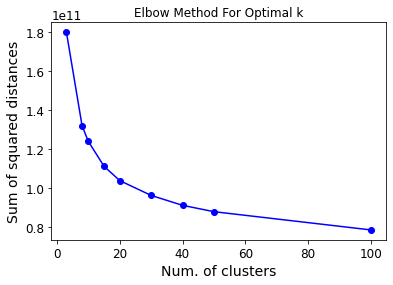

In [31]:
plt.plot(num_clusters, sum_of_squared_distances, 'bo-')
plt.xlabel('Num. of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this elbow plot we can see that the optimal number of clusters is somewhere between 10 and 25, so lets look at cluster totals 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, and 31

In [32]:
kmeans_dict = {}
ssd_dict = {} #Sum of squared distance
num_clusters = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 31]

for i in num_clusters:
    kmeans_dict[i] = KMeans(n_clusters=i, random_state=42)

for k, v in kmeans_dict.items():
    kmeans_dict[k] = v.fit(X_train)


for k, v in kmeans_dict.items():
    ssd_dict[k] = v.inertia_

In [33]:
sum_of_squared_distances = []
for k, v in ssd_dict.items():
    sum_of_squared_distances.append(v)

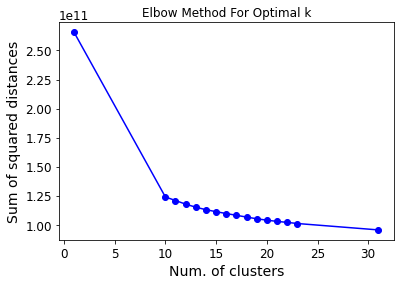

In [34]:
plt.plot(num_clusters, sum_of_squared_distances, 'bo-')
plt.xlabel('Num. of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This didn't help too much, the initial thought is that 10 is the optimal because its a hard elbow, but if 10 wasn't a cluster argument, 11 would have been the initial thought. Cluster numbers 10 to 15 seem to be pretty optimal.

# Gaussian Mixture

In [48]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X_train)
gm.means_

array([[1.45305800e-03, 8.34162928e-03, 5.53776550e-02, ...,
        2.32268630e+00, 3.35360396e-01, 9.84850424e-03],
       [0.00000000e+00, 2.58352716e-03, 2.71489294e-03, ...,
        3.45404446e+00, 1.70197516e+00, 1.68542306e-01]])

In [49]:
gm.predict(X_train)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
y_pred = gm.predict(X_train)
print(homogeneity_score(y_train, y_pred))

0.23569132598991122


A low homogeneity score because i'v only allowed for two 'classes'

In [51]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=0).fit(X_train)
gm.means_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.52833018e+00, 0.00000000e+00, 0.00000000e+00],
       [2.28440891e-03, 2.45573958e-02, 9.70873786e-02, ...,
        1.33529412e+01, 6.04397487e+00, 7.98972016e-01],
       ...,
       [2.88065844e-02, 3.08641975e-02, 1.44032922e-01, ...,
        1.94938272e+01, 8.68106996e+00, 4.60905350e-01],
       [0.00000000e+00, 4.91159136e-04, 2.75049116e-02, ...,
        2.95186640e-01, 2.15618861e-01, 6.58153242e-02],
       [0.00000000e+00, 8.20170109e-02, 4.80558931e-01, ...,
        9.79100851e+00, 2.33718104e+00, 2.66707169e-01]])

In [52]:
gm.predict(X_train)

array([8, 5, 1, ..., 1, 2, 5], dtype=int64)

In [53]:
y_pred = gm.predict(X_train)
print(homogeneity_score(y_train, y_pred))

0.46218185165346665


With 10 clusters the homogeneity improves

# Affinity Propagation

In [38]:
X = X_train[:1000]

In [39]:
from sklearn.cluster import AffinityPropagation

In [40]:
clustering = AffinityPropagation(random_state=42).fit(X)
clustering

AffinityPropagation(random_state=42)

In [41]:
clustering.labels_

array([12, 20,  0,  3, 31, 11, 37, 32, 33, 34, 10, 32,  7, 10, 39, 42, 27,
       31, 19, 21, 18, 15, 17, 36, 19, 28,  0, 11, 41, 49,  7, 14, 15, 42,
       37, 23, 32, 28, 24, 37,  0, 42, 16, 44, 44, 15, 46,  6, 41, 46, 23,
       39, 24,  0, 48, 28, 23, 34,  8,  0,  7, 20, 17, 19,  1, 34,  1, 45,
        4, 49,  2, 43, 48, 17, 11, 13, 37,  0, 18, 15,  9,  2, 33, 34, 48,
        8,  6,  9, 18, 11, 10, 41,  3, 48, 41, 21, 41,  4,  2,  9, 12, 32,
       44, 32, 40,  3, 30, 32, 39, 48, 10, 41, 24,  5, 16,  6, 17, 16,  9,
        9, 46, 36, 44, 11, 40, 10, 21, 15,  7, 41, 41, 42, 40,  8, 41, 24,
        8, 47, 32, 47, 44, 39, 21, 42,  9,  8, 32, 41, 23, 31,  6,  2, 17,
       34,  4,  3,  6, 32, 39, 47, 22,  7, 21,  6,  3, 29, 23, 15,  6, 32,
       10, 23, 24,  8, 44,  0, 47, 22, 17, 27,  2, 21, 42, 14, 38, 31, 32,
       11, 19, 46, 18, 48, 41,  6,  7,  6, 32, 18, 17, 32, 37, 27, 32, 33,
       41, 48, 33, 41,  8, 23, 11, 23, 24, 49, 46, 41, 40, 12,  9,  5, 21,
       14, 10, 19, 37, 46

In [42]:
y_pred = clustering.predict(X)
print(homogeneity_score(y_train[:1000], y_pred))

0.6658886359078774


In [43]:
clustering.cluster_centers_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 6, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Mean Shift

In [ ]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_

In [45]:
y_pred = clustering.predict(X)

In [46]:
print(homogeneity_score(y_train[:1000], y_pred))

0.9999999999999998


Almost homogeneous, this is because the mean shift has classified each cluster as a different label. So better homogeneous performance from mean shift, but it's obviosuly not true to labels, and the result is insignificantly pointless.

# Hierarchical | Agglomerative Clustering 

In [47]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [48]:
y_pred = clustering.labels_

In [79]:
zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0
nine = 0
ten = 10
other = 0

for i in y_pred:
    if i == 0:
        zero+=1
    elif i == 1:
        one+=1
    elif i == 2:
        two+=1
    elif i == 3:
        three+=1
    elif i == 4:
        four+=1
    elif i == 5:
        five+=1
    elif i == 6:
        six+=1
    elif i == 7:
        seven+=1
    elif i == 8:
        eight+=1
    elif i == 9:
        nine+=1
    elif i == 10:
        ten+=1
    else:
        other+=1

print("COUNT")
print("Zero: " + str(zero))
print("One: " + str(one))
print("Two: " + str(two))
print("Three: " + str(three))
print("Four: " + str(four))
print("Five: " + str(five)) 
print("Six: " + str(six))
print("Seven: " + str(seven)) 
print("Eight: " + str(eight)) 
print("Nine: " + str(nine))
print("Ten: " + str(ten))
print("Other: " + str(other))

COUNT
Zero: 2339
One: 6511
Two: 7626
Three: 9659
Four: 2588
Five: 9062
Six: 2980
Seven: 7547
Eight: 4306
Nine: 7382
Ten: 10
Other: 0


In [49]:
print(homogeneity_score(y_train[:1000], y_pred))

0.13807696066021058


# Birch

In [80]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=None)
brc.fit(X)

Birch(n_clusters=None)

In [81]:
y_pred = brc.predict(X)

In [82]:
print(homogeneity_score(y_train[:1000], y_pred))

1.0


Homogeneous because there are 0 clusters. Every single image is given a different label.

In [83]:
y_pred

array([963,  11, 531, 879, 781, 915, 827, 327, 678,   0, 861, 294, 365,
       523, 652, 267, 964, 828, 759, 424,   1, 113, 760, 965, 829, 916,
       532, 699, 158, 782, 357, 880, 114, 268, 830,  89, 201, 644, 581,
       761, 533, 269, 917, 382, 383, 115, 653, 159, 295, 220,  12, 221,
       645, 534, 490, 600,  13, 737, 384, 535,  48,  14, 700, 831,  49,
       738,   2, 918,  90, 783, 919, 920, 471, 832, 601,  62, 762, 536,
       222,  15, 784, 654, 602,   3, 472, 223, 116, 425, 202, 537, 921,
       380, 881, 473, 160, 385, 203, 117, 922, 426, 966, 328, 701, 329,
       427, 833, 967,  16, 224, 474, 582, 161, 646, 475, 923,  17, 702,
       924, 428, 429, 225, 925, 270, 703, 785, 834, 296,  18,   4, 162,
       163, 204, 430, 835,   5, 538, 431, 491, 297, 492, 882, 226, 386,
       271, 786, 387, 298,   6,  19, 787, 118, 599, 704, 388,  63, 883,
       119,   7, 227, 493, 366, 330, 205, 120, 884,  91,  20, 121, 122,
       331, 739, 926, 539, 705, 389, 540, 494, 927, 836,  92, 65

* The advantage here is that it is unsupervised learning, clustering finds similarities in the images, which is almost like classifying without training which is impressive. This also saves time as training can take time.
* Clustering with other algorithms that weren't K-means was problematic due to the amount of memory needed to do the computations, so I had to only select 1000 images.
* Finding the optimal K value by a graph isn't the most precise method of finding an optimal value, it was quite hard to determine where the actual perfect elbow point was.
* It shouldnt be compared to naive bayes because naive bayes gets the chance to train, and therefore will perform more accurate classifying in comparison to the clustering algorithms just finding similarities in images and grouping them together.
* Naive Bayes classified an image as either something or not something, which is a different process to what takes place here where images are grouped together, K-means is not returning true or false.

# Categorical Naive Bayes

In [39]:
y_train_0 = (y_train == 0)

import numpy as np

rng = np.random.RandomState(1)

X = X_train
Y = y_train_0

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, Y)
CategoricalNB()
CategoricalPredictions = clf.predict(X)

In [40]:
from tabulate import tabulate

countFalse = 0
countTrue = 0

for i in CategoricalPredictions:
    if i == False:
        countFalse += 1
    elif i == True:
        countTrue += 1
        
print(tabulate([['False', countFalse],['True', countTrue]]))

-----  -----
False  46815
True   13185
-----  -----


In [41]:
from sklearn.metrics import accuracy_score
y_pred = CategoricalPredictions
y_true = y_train_0
print(accuracy_score(y_true, y_pred))

print(accuracy_score(y_true, y_pred, normalize=False))

accuracy = accuracy_score(y_true, y_pred)


0.8706833333333334
52241


In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[46528,  7472],
       [  287,  5713]], dtype=int64)

In [43]:
46528 / (52380 + 7472)

0.777384214395509

# Precision

In [44]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred)

0.433295411452408

# Recall

In [45]:
recall_score(y_true, y_pred)

0.9521666666666667

# F1 Score - balance between precision and recall

In [46]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.5955694553036226

# Homogeneity Score

In [47]:
print(homogeneity_score(y_true, y_pred))

0.44784891740454147
